In [1]:
from qiskit import QuantumCircuit, QuantumRegister

r = QuantumRegister(1, "usman")
circuit = QuantumCircuit(r)
circuit.h(r)
circuit.s(r)
circuit.h(r)
circuit.t(r)
circuit.draw()
# print(help(QuantumRegister))

┌───┐┌───┐┌───┐┌───┐
usman: ┤ H ├┤ S ├┤ H ├┤ T ├
       └───┘└───┘└───┘└───┘

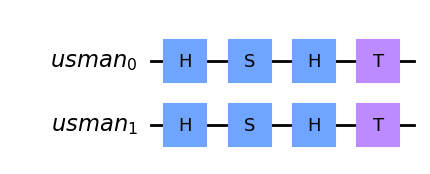

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

r = QuantumRegister(2, "usman")
circuit = QuantumCircuit(r)
circuit.h(r)
circuit.s(r)
circuit.h(r)
circuit.t(r)
circuit.draw(output='mpl')
# print(dir(circuit))

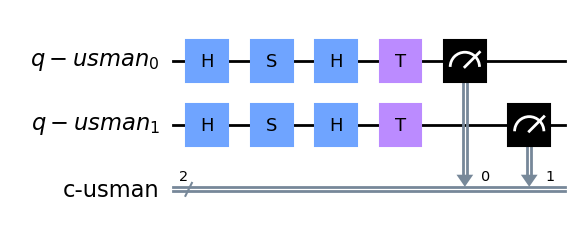

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(2, "q-usman")
c = ClassicalRegister(2, "c-usman")
circuit = QuantumCircuit(q, c)
circuit.h(q)
circuit.s(q)
circuit.h(q)
circuit.t(q)
# print(help(circuit.measure))
circuit.measure(q,c)
circuit.draw(output='mpl')
# print(dir(circuit))

In [4]:
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌─┐   
q-usman_0: ┤ H ├┤ S ├┤ H ├┤ T ├┤M├───
           ├───┤├───┤├───┤├───┤└╥┘┌─┐
q-usman_1: ┤ H ├┤ S ├┤ H ├┤ T ├─╫─┤M├
           └───┘└───┘└───┘└───┘ ║ └╥┘
c-usman: 2/═════════════════════╩══╩═
                                0  1

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw())

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

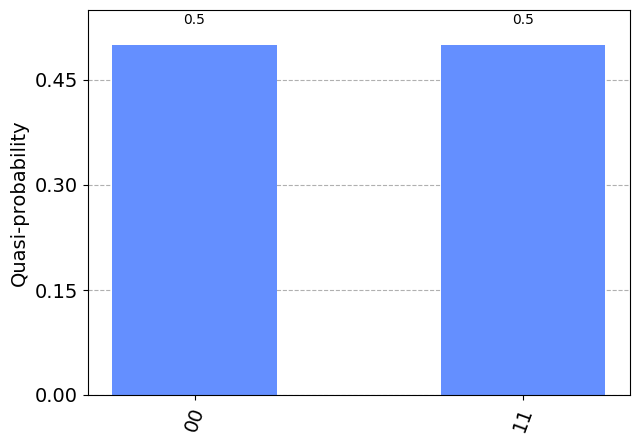

In [6]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
results = sampler.run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

In [7]:
from qiskit import Aer  # simulator framework from qiskit

# will create a statevector of possibilities. 
sim_backend = Aer.get_backend('qasm_simulator')

for backend in Aer.backends():
    print(backend)

# qasm_simulator
# statevector_simulator
# unitary_simulator

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [ ]:
import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

N = 15
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(N)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result.factors[0]}.")

print(f'Computed of qubits for circuit: {4 * math.ceil(math.log(N, 2)) + 2}')
print(f'Actual number of qubits of circuit: {shor.construct_circuit(N).num_qubits}')